<a href="https://colab.research.google.com/github/aiyafi/Tugas_PCD_Assigment3_1301200362_Afrizal_Ihyauddin_Yafi-.ipynb/blob/main/Tugas_PCD_Assigment3_1301200362_Afrizal_Ihyauddin_Yafi'.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CII4F3 PEMROSESAN CITRA DIGITAL**

---



#Assignment 3: Local Histogram Equalization (LHE) program.

### by Afrizal Ihyauddin Yafi' - 1301200362

---
Image processing using Local Histogram Equalization (LHE) method to enhance the contrast of an image by independently equalizing the histograms of small, local regions, allowing for improved visibility of details in different parts of the image.

<br>

atch: <br>

[Google Colab link](https://colab.research.google.com/drive/1n1UHcmFFPphZfhKR0xZnoJBDBCa8R1mF?usp=sharing) *or* https://colab.research.google.com/drive/1n1UHcmFFPphZfhKR0xZnoJBDBCa8R1mF?usp=sharing

References: <br>

- [Github | Local-Histogram](https://github.com/ahoirg/Local-Histogram)
- [Github | # Local Histogram Equalization](https://gist.github.com/sabopy/ad95c5400d55a2fff580705104678125)
- [YouTube | #25 OPENCV - PYTHON I Image Histogram Equalization | Gray & Color Histograms | Brightness & Contrast](https://youtu.be/Fe_z9loJqBU?si=JCtT4zPTsuV4Gwqo)
- [YouTube | 113 - Histogram equalization and CLAHE](https://youtu.be/jWShMEhMZI4?si=fCFja4aK3Svvq8XH)

In [ ]:
# Libraries used.

import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

In [ ]:
# Directly specify the image path
image_path = "/content/drive/MyDrive/assets/dataset/IMG_2249.jpg"
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB

## Note: Where the image used is the result of my own capture.
## Here is the proof.

This code snippet is designed to retrieve and display Exif (Exchangeable Image File Format) metadata from an image. Exif data often contains crucial information about the image, such as camera settings, timestamps, geolocation data, and many more.

In [ ]:
# Open the image using Pillow.
with Image.open(image_path) as img:
    # Extract EXIF data.
    exif_data = img._getexif()

if exif_data:
    print("EXIF DATA\n")
    for tag, value in exif_data.items():
        if tag != 37500:
            print(f"{tag}: {value}")
else:
    print("No EXIF data found in the image.")

EXIF DATA

322: 512
323: 512
34853: {1: 'S', 2: (6.0, 58.0, 9.98), 3: 'E', 4: (107.0, 37.0, 42.28), 5: b'\x00', 6: 668.3632660977502, 12: 'K', 13: 0.9900000095374253, 16: 'T', 17: 313.5839231547017, 23: 'T', 24: 313.5839231547017, 31: 16.926688163884673}
296: 2
34665: 250
271: Apple
272: iPhone 12 mini
305: 16.1
274: 1
306: 2022:12:14 08:29:08
282: 72.0
283: 72.0
316: iPhone 12 mini
36864: b'0232'
37377: 11.53068914229053
37378: 1.3561438092556088
36867: 2022:12:14 08:29:08
36868: 2022:12:14 08:29:08
37379: 9.859969813852087
37380: 0.0
37383: 5
40961: 65535
37385: 16
37386: 4.2
40962: 4032
40963: 3024
41989: 26
36880: +07:00
36881: +07:00
36882: +07:00
37521: 453
37396: (2009, 1502, 2208, 1387)
37522: 453
41495: 2
33434: 0.0003379520108144643
33437: 1.6
41729: b'\x01'
34850: 2
34855: 32
41986: 0
41987: 0
42034: (1.5499999523160568, 4.2, 1.6, 2.4)
42035: Apple
42036: iPhone 12 mini back dual wide camera 4.2mm f/1.6
42080: 2


In [ ]:
def plot_rgb_histograms(image, title):
    """
    Plots separate histograms for each channel (R, G, B) in the input image.

    Parameters:
    image (ndarray): 3-channel image.
    title (str): Title for the entire plot.
    """
    channels = cv2.split(image)  # Split the image into R, G, and B channels
    colors = ('r', 'g', 'b')  # Colors corresponding to each channel
    labels = ('Red', 'Green', 'Blue')  # Labels for each subplot

    # Create subplots for each channel
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))

    # Loop over the channels
    for i, (channel, color) in enumerate(zip(channels, colors)):
        histogram = cv2.calcHist([channel], [0], None, [256], [0, 256])

        axs[i].plot(histogram, color=color)
        axs[i].set_xlim([0, 256])
        axs[i].set_title(labels[i])
        axs[i].set_xlabel('Intensity')
        axs[i].set_ylabel('Frequency')

    # Set the main title for all subplots
    plt.suptitle(title, fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout
    plt.show()

def display_histogram_table_v2(image):
    """
    Displays histogram values in a simplified table format for R, G, B channels of the input image.

    Parameters:
    image (ndarray): 3-channel image.
    """
    channels = cv2.split(image)  # Split the image into R, G, and B channels
    colors = ('Red', 'Green', 'Blue')  # Colors corresponding to each channel

    for color, channel in zip(colors, channels):
        histogram = cv2.calcHist([channel], [0], None, [256], [0, 256]).flatten()

        # Printing the histogram values in the new format
        print(f"\n{color} Channel:")
        print("(i) | h(i)")
        for i, val in enumerate(histogram):
            print(f"{i} : {int(val)}")

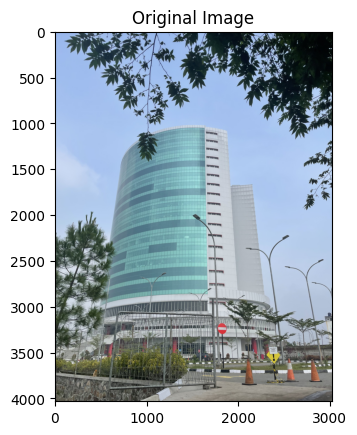

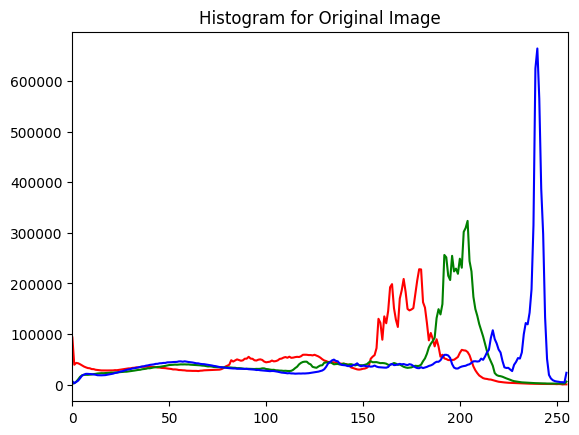

In [ ]:
# Display the original image
plt.imshow(image_rgb)
plt.title('Original Image')
plt.show()

# Display the separated RGB Histograms
color = ('r', 'g', 'b')
for i, col in enumerate(color):
    histr = cv2.calcHist([image_rgb], [i], None, [256], [0, 256])
    plt.plot(histr, color=col)
    plt.xlim([0, 256])
plt.title('Histogram for Original Image')
plt.show()

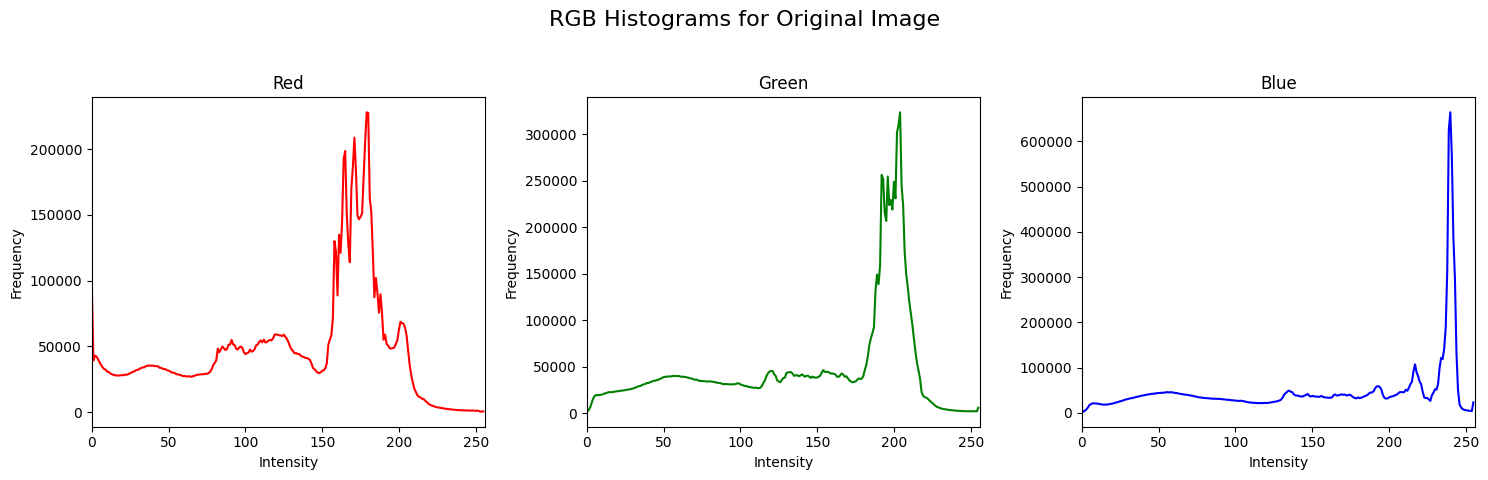

In [ ]:
# Call function to plot the histograms for original image.
plot_rgb_histograms(image_rgb, 'RGB Histograms for Original Image')

In [ ]:
# Use the function to display the table for the original image
display_histogram_table_v2(image_rgb)


Red Channel:
(i) | h(i)
0 : 93183
1 : 39329
2 : 42972
3 : 42212
4 : 40324
5 : 38102
6 : 35790
7 : 34160
8 : 32788
9 : 32371
10 : 30794
11 : 30636
12 : 29426
13 : 28950
14 : 28447
15 : 28116
16 : 28027
17 : 27793
18 : 28041
19 : 28071
20 : 28274
21 : 28171
22 : 28684
23 : 28562
24 : 29144
25 : 29652
26 : 30310
27 : 30857
28 : 31295
29 : 32129
30 : 32209
31 : 33133
32 : 33394
33 : 34157
34 : 34056
35 : 34888
36 : 35386
37 : 35381
38 : 35460
39 : 35307
40 : 35402
41 : 35116
42 : 34948
43 : 34960
44 : 33858
45 : 33777
46 : 33071
47 : 32919
48 : 32596
49 : 31943
50 : 31540
51 : 31004
52 : 30082
53 : 30146
54 : 29749
55 : 28897
56 : 28836
57 : 28421
58 : 28250
59 : 27565
60 : 27522
61 : 27387
62 : 27191
63 : 27307
64 : 27205
65 : 26835
66 : 27540
67 : 27746
68 : 28310
69 : 28462
70 : 28614
71 : 28736
72 : 28922
73 : 28885
74 : 29237
75 : 29256
76 : 29679
77 : 30719
78 : 32653
79 : 35736
80 : 37433
81 : 39397
82 : 48348
83 : 45631
84 : 47724
85 : 49934
86 : 48656
87 : 47300
88 : 48003
89 : 5

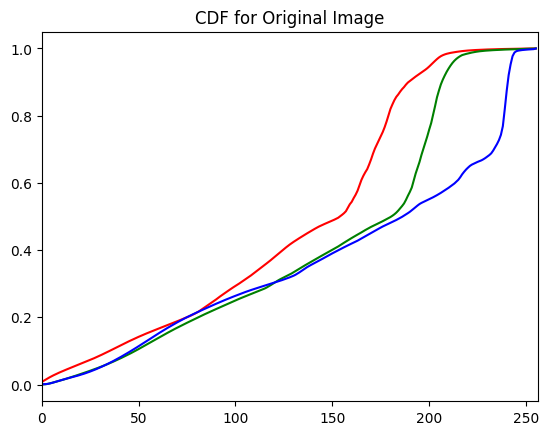

In [ ]:
def compute_cdf(image_channel):
    """Compute the CDF for a given image channel."""
    # Calculate the histogram
    hist = cv2.calcHist([image_channel], [0], None, [256], [0, 256])
    # Calculate the CDF
    cdf = hist.cumsum()
    # Normalize the CDF to [0, 1]
    cdf_normalized = cdf / cdf.max()
    return cdf_normalized

# Display the separated RGB CDFs for the original image
for i, col in enumerate(color):
    cdf_normalized = compute_cdf(image_rgb[:,:,i])
    plt.plot(cdf_normalized, color=col)
    plt.xlim([0, 256])
plt.title('CDF for Original Image')
plt.show()

## Performinng contrast enhancement

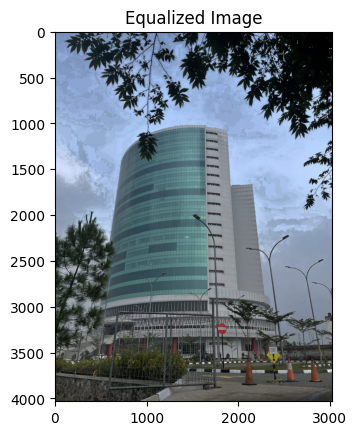

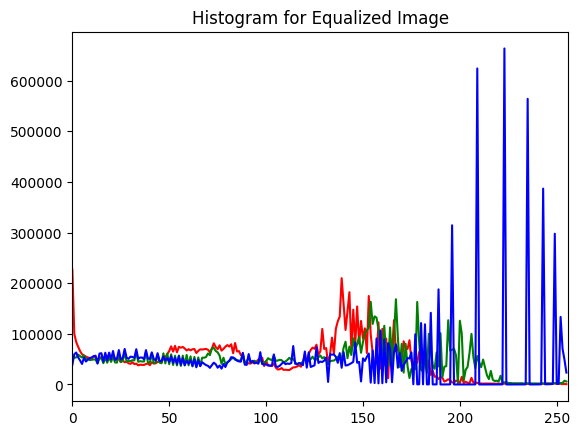

In [ ]:
# Convert the image from RGB to HSV to better separate the intensity component
image_hsv = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2HSV)
h, s, v = cv2.split(image_hsv)

# Apply histogram equalization only on the V channel
equalized_v = cv2.equalizeHist(v)

# Merge the equalized V channel back with the original H and S channel
image_equalized_hsv = cv2.merge((h, s, equalized_v))

# Convert back from HSV to RGB
image_equalized_rgb = cv2.cvtColor(image_equalized_hsv, cv2.COLOR_HSV2RGB)

# Display the equalized image
plt.imshow(image_equalized_rgb)
plt.title('Equalized Image')
plt.show()

# Display the separated RGB Histograms for the equalized image
for i, col in enumerate(color):
    histr = cv2.calcHist([image_equalized_rgb], [i], None, [256], [0, 256])
    plt.plot(histr, color=col)
    plt.xlim([0, 256])

plt.title('Histogram for Equalized Image')
plt.show()

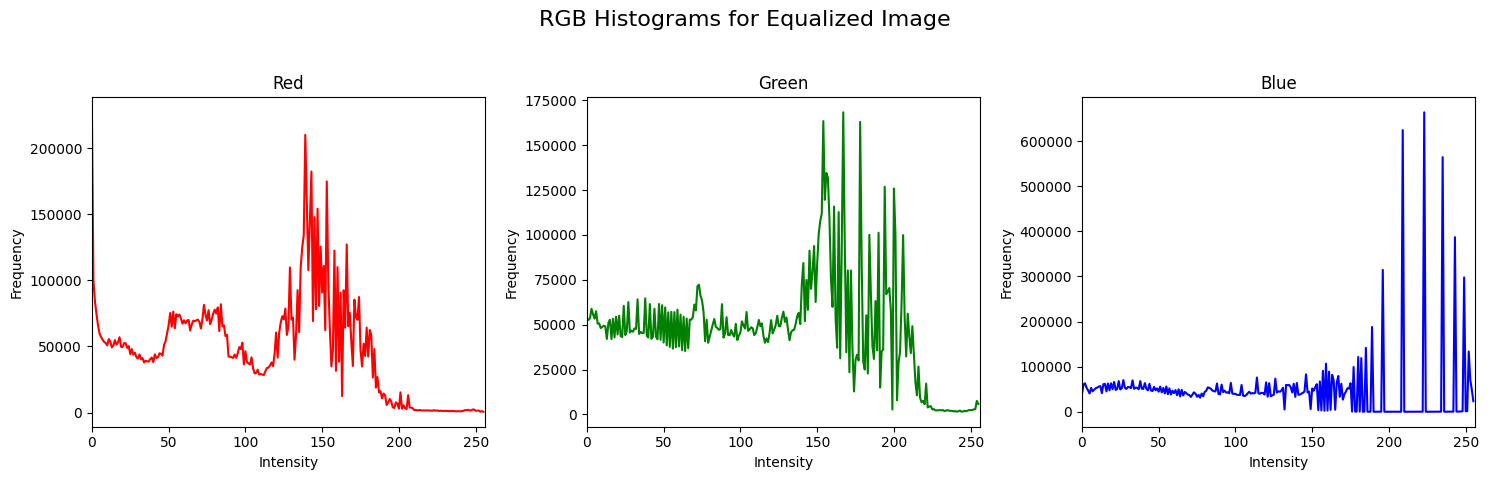

In [ ]:
# Call function to plot the histograms for equalized image.
plot_rgb_histograms(image_equalized_rgb, 'RGB Histograms for Equalized Image')

In [ ]:
# Use the function to display the table for the original image
display_histogram_table_v2(image_equalized_rgb)


Red Channel:
(i) | h(i)
0 : 227006
1 : 99948
2 : 83745
3 : 74278
4 : 65725
5 : 59661
6 : 57038
7 : 55064
8 : 53364
9 : 52530
10 : 50778
11 : 55564
12 : 53491
13 : 49306
14 : 50672
15 : 54774
16 : 51372
17 : 53096
18 : 56952
19 : 49687
20 : 49605
21 : 52510
22 : 52398
23 : 48867
24 : 50205
25 : 44136
26 : 47981
27 : 43772
28 : 45248
29 : 41833
30 : 40830
31 : 43930
32 : 40284
33 : 41167
34 : 37822
35 : 39196
36 : 38675
37 : 38589
38 : 40460
39 : 41561
40 : 38076
41 : 43985
42 : 41290
43 : 41787
44 : 44785
45 : 44452
46 : 43056
47 : 51237
48 : 53984
49 : 59920
50 : 66126
51 : 75261
52 : 64935
53 : 76331
54 : 63691
55 : 74365
56 : 72668
57 : 74115
58 : 71191
59 : 67194
60 : 69749
61 : 67459
62 : 69589
63 : 69980
64 : 62062
65 : 66340
66 : 69451
67 : 69020
68 : 69637
69 : 70298
70 : 68574
71 : 63603
72 : 70572
73 : 81373
74 : 73931
75 : 69648
76 : 77352
77 : 66868
78 : 70301
79 : 74709
80 : 77796
81 : 74858
82 : 79454
83 : 61604
84 : 81899
85 : 65163
86 : 65960
87 : 57845
88 : 58655
89 : 

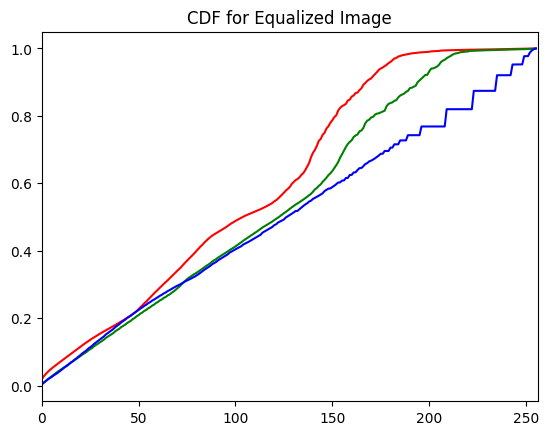

In [ ]:
# Display the separated RGB CDFs for the equalized image
for i, col in enumerate(color):
    cdf_normalized = compute_cdf(image_equalized_rgb[:,:,i])
    plt.plot(cdf_normalized, color=col)
    plt.xlim([0, 256])
plt.title('CDF for Equalized Image')
plt.show()

## Grayscale

In [ ]:
# Grayscale process

# Convert the image to grayscale
gray_image = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)

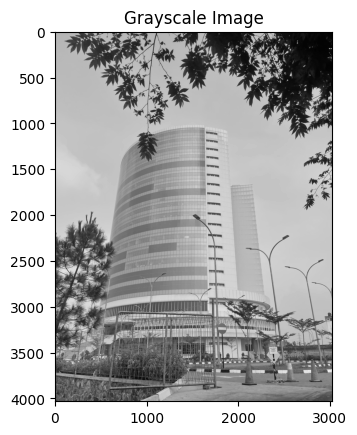

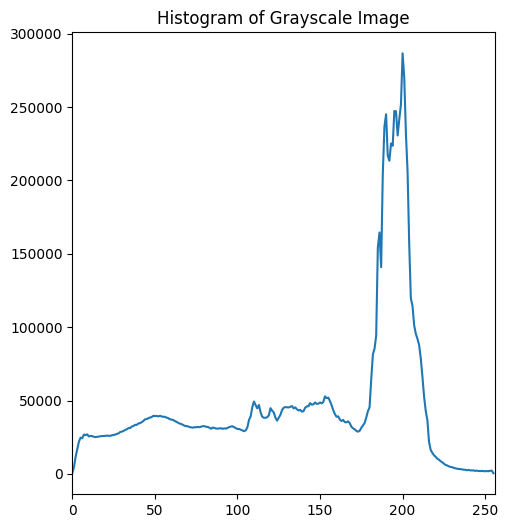

In [ ]:
# Display the grayscale image
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')
plt.show()

# Plot histogram and CDF of the grayscale image
hist_gray = cv2.calcHist([gray_image], [0], None, [256], [0, 256])
cdf_gray = hist_gray.cumsum()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(hist_gray)
plt.title('Histogram of Grayscale Image')
plt.xlim([0, 256])
plt.show()

In [ ]:
def display_histogram_table_gray(image):
    """
    Displays histogram values in a simplified table format for a grayscale image.

    Parameters:
    image (ndarray): Single-channel grayscale image.
    """

    histogram = cv2.calcHist([image], [0], None, [256], [0, 256]).flatten()

    # Printing the histogram values in the new format
    print("\nGrayscale Channel:")
    print("(i) | h(i)")
    for i, val in enumerate(histogram):
        print(f"{i} : {int(val)}")

In [ ]:
display_histogram_table_gray(gray_image)


Grayscale Channel:
(i) | h(i)
0 : 708
1 : 4692
2 : 11770
3 : 16844
4 : 22058
5 : 24695
6 : 24250
7 : 26818
8 : 26362
9 : 26931
10 : 25515
11 : 25889
12 : 25741
13 : 25299
14 : 25063
15 : 25222
16 : 25410
17 : 25664
18 : 25762
19 : 25809
20 : 25932
21 : 26035
22 : 25974
23 : 25912
24 : 26332
25 : 26500
26 : 26818
27 : 27248
28 : 27624
29 : 28551
30 : 28786
31 : 29297
32 : 29912
33 : 30404
34 : 31189
35 : 31235
36 : 32258
37 : 32651
38 : 33423
39 : 33386
40 : 34391
41 : 34570
42 : 35229
43 : 36037
44 : 37171
45 : 37363
46 : 37898
47 : 38406
48 : 38665
49 : 39566
50 : 39393
51 : 39501
52 : 39159
53 : 39516
54 : 39171
55 : 38870
56 : 38945
57 : 38325
58 : 38044
59 : 37245
60 : 36998
61 : 36790
62 : 36047
63 : 35518
64 : 34832
65 : 34283
66 : 33959
67 : 33414
68 : 32754
69 : 32555
70 : 32367
71 : 31889
72 : 31698
73 : 31478
74 : 31829
75 : 31754
76 : 32034
77 : 31820
78 : 32206
79 : 32529
80 : 32495
81 : 32120
82 : 31928
83 : 31526
84 : 30746
85 : 31563
86 : 31343
87 : 30891
88 : 30831
89 

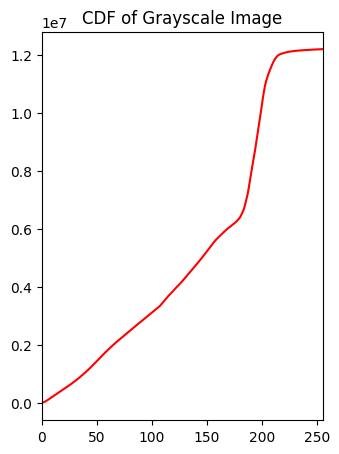

In [ ]:
# Plot CDF of the grayscale image
plt.subplot(1, 2, 2)
plt.plot(cdf_gray, color='r')
plt.title('CDF of Grayscale Image')
plt.xlim([0, 256])
plt.tight_layout()
plt.show()

In [ ]:
# Apply Local Histogram Equalization
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
equalized_image = clahe.apply(gray_image)

## Contrast enhancement through Local Histogram Equalization.

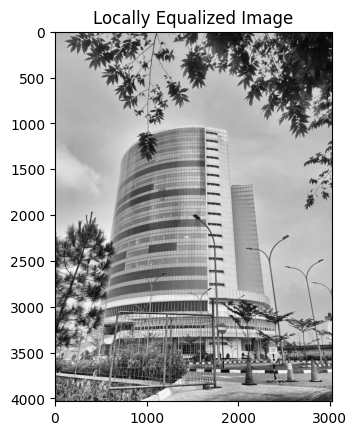

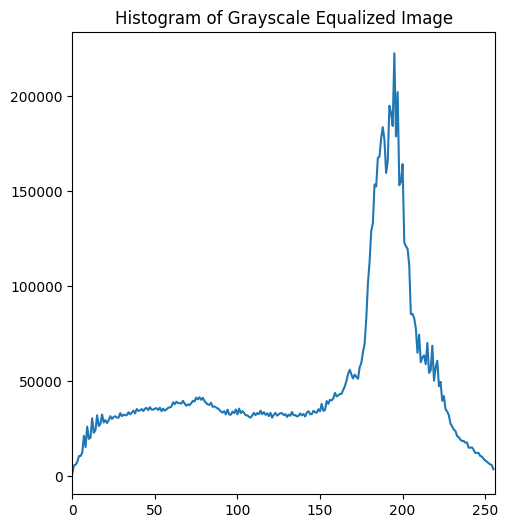

In [ ]:
# Display the equalized image
plt.imshow(equalized_image, cmap='gray')
plt.title('Locally Equalized Image')
plt.show()

# Plot histogram of the equalized image
hist_eq = cv2.calcHist([equalized_image], [0], None, [256], [0, 256])
cdf_eq = hist_eq.cumsum()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(hist_eq)
plt.title('Histogram of Grayscale Equalized Image')
plt.xlim([0, 256])
plt.show()

In [ ]:
display_histogram_table_gray(equalized_image)


Grayscale Channel:
(i) | h(i)
0 : 1642
1 : 5821
2 : 6144
3 : 7697
4 : 10654
5 : 10737
6 : 12470
7 : 21371
8 : 15463
9 : 26198
10 : 19737
11 : 20341
12 : 30554
13 : 22940
14 : 24308
15 : 32127
16 : 26513
17 : 27600
18 : 32562
19 : 28356
20 : 29648
21 : 28026
22 : 29612
23 : 31645
24 : 30252
25 : 31275
26 : 31624
27 : 30924
28 : 30897
29 : 33294
30 : 31686
31 : 32495
32 : 32165
33 : 32247
34 : 33726
35 : 32616
36 : 33548
37 : 34584
38 : 33135
39 : 35455
40 : 34472
41 : 34770
42 : 35398
43 : 34355
44 : 35650
45 : 36011
46 : 34898
47 : 36394
48 : 35139
49 : 35174
50 : 35656
51 : 35869
52 : 34965
53 : 36173
54 : 34339
55 : 35607
56 : 34586
57 : 35231
58 : 36078
59 : 36298
60 : 36730
61 : 38985
62 : 37949
63 : 39293
64 : 38582
65 : 38523
66 : 38304
67 : 39736
68 : 38331
69 : 37184
70 : 37897
71 : 37469
72 : 38521
73 : 39822
74 : 39370
75 : 41444
76 : 40483
77 : 41613
78 : 40276
79 : 41359
80 : 39615
81 : 38666
82 : 37834
83 : 37629
84 : 38734
85 : 36590
86 : 36817
87 : 36288
88 : 35783
89 :

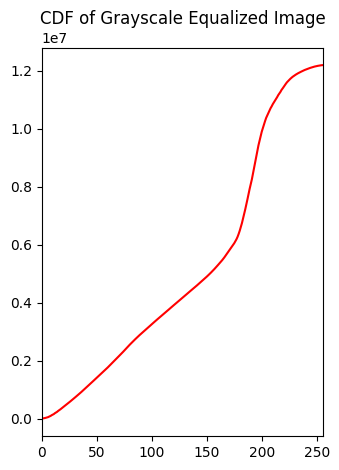

In [ ]:
# Plot CDF of the equalized image
plt.subplot(1, 2, 2)
plt.plot(cdf_eq, color='r')
plt.title('CDF of Grayscale Equalized Image')
plt.xlim([0, 256])
plt.tight_layout()
plt.show()